In [3]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow_io as tfio

In [5]:
NOT_CAPUCHIN_FILE =os.path.join('data', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')
CAPUCHIN_FILE = os.path.join('data', 'Parsed_Capuchinbird_Clips', 'XC3776-0.wav')

In [6]:
#data loading function

def load_wav_16k_mono(filename):
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis = -1)
    sample_rate = tf.cast(sample_rate, dtype = tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)

    return wav

In [7]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

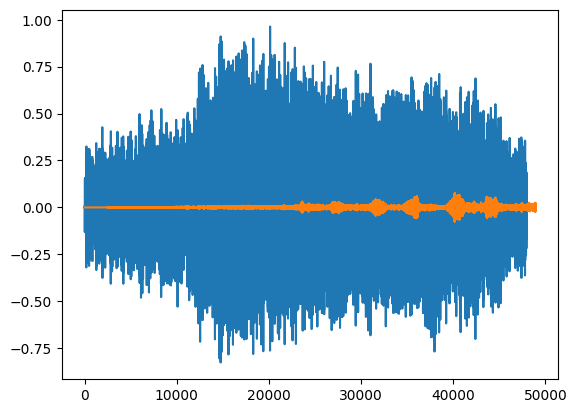

In [8]:
plt.plot(wave)
plt.plot(nwave)

plt.show()

In [9]:
POS = os.path.join('data', 'Parsed_Capuchinbird_Clips')
NEG = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips')

In [10]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [11]:
pos.as_numpy_iterator().next()

b'data/Parsed_Capuchinbird_Clips/XC178167-1.wav'

In [12]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))

In [13]:
data = positives.concatenate(negatives)

In [14]:
data.shuffle(12000).as_numpy_iterator().next()

(b'data/Parsed_Not_Capuchinbird_Clips/crickets-chirping-crickets-sound-16.wav',
 0.0)

In [15]:
lengths = []

for file in os.listdir(os.path.join('data', 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('data', 'Parsed_Capuchinbird_Clips', file))

    lengths.append(len(tensor_wave))

In [16]:
lengths

[56000,
 56000,
 40000,
 56000,
 56000,
 56000,
 48000,
 40000,
 56000,
 48000,
 56000,
 48000,
 48000,
 64000,
 48000,
 64000,
 48000,
 32000,
 64000,
 56000,
 56000,
 32000,
 48000,
 48000,
 56000,
 56000,
 64000,
 64000,
 56000,
 56000,
 64000,
 56000,
 48000,
 56000,
 56000,
 56000,
 32000,
 56000,
 40000,
 64000,
 64000,
 72000,
 40000,
 48000,
 40000,
 48000,
 40000,
 80000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 56000,
 56000,
 56000,
 56000,
 56000,
 48000,
 56000,
 48000,
 56000,
 56000,
 48000,
 48000,
 48000,
 56000,
 56000,
 40000,
 48000,
 48000,
 64000,
 64000,
 56000,
 64000,
 48000,
 48000,
 56000,
 56000,
 64000,
 56000,
 64000,
 55999,
 48000,
 39999,
 56000,
 56000,
 56000,
 40000,
 56000,
 48000,
 64000,
 48000,
 64000,
 48000,
 56000,
 48000,
 55999,
 64000,
 56000,
 64000,
 64000,
 64000,
 64000,
 55999,
 64000,
 40000,
 56000,
 40000,
 56000,
 56000,
 40000,
 56000,
 64000,
 40000,
 56000,
 64000,
 56000,
 56000,
 64000,
 40000,
 64000,
 64000,
 48000,


In [17]:
#it is important to know the length of the sound you wanna predict on

In [18]:
tf.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [19]:
tf.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [20]:
tf.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [21]:
#so let's grab around 48000

In [22]:
#now converting our data into the spectrogram

In [23]:
def preprocess(filename, label):
    wav = load_wav_16k_mono(filename)

    wav = wav[:48000]

    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype = tf.float32) #gives us the number of zeroes required to pad the file

    wav = tf.concat([zero_padding, wav],0) #concatenating zeroes and our wav file

    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)  #ocnverting it into the absolute set of values
    spectrogram = tf.expand_dims(spectrogram, axis=2)

    return spectrogram, label

In [24]:
wav = CAPUCHIN_FILE
wav = load_wav_16k_mono(CAPUCHIN_FILE)

In [25]:
wav

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 1.0432389e-06, -3.0215922e-06,  1.9820709e-06, ...,
       -4.5542806e-02, -5.4887902e-02, -8.5778177e-02], dtype=float32)>

In [26]:
wav = wav[:48000]
zero_padding = tf.zeros([48000] - tf.shape(wav), dtype = tf.float32) #gives us the number of zeroes required to pad the file
wav = tf.concat([zero_padding, wav],0) #concatenating zeroes and our wav file

In [27]:
wav

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 1.0432389e-06, -3.0215922e-06,  1.9820709e-06, ...,
       -4.5542806e-02, -5.4887902e-02, -8.5778177e-02], dtype=float32)>

In [28]:
spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)

In [29]:
spectrogram

<tf.Tensor: shape=(1491, 257), dtype=complex64, numpy=
array([[ 1.92845687e-02+0.0000000e+00j,  2.49078311e-02-3.6791340e-03j,
         2.54350007e-02-1.4371678e-02j, ...,
        -3.02447937e-04+8.6299144e-05j,  2.38768756e-04+8.8959234e-05j,
        -4.28035855e-05+0.0000000e+00j],
       [-9.84251499e-03+0.0000000e+00j, -1.12460554e-03+6.0148314e-03j,
        -8.06714036e-03+2.7199760e-03j, ...,
        -2.30234582e-04+3.9942004e-04j,  1.87115627e-04-1.4139526e-04j,
        -2.18451023e-04+0.0000000e+00j],
       [-1.10915005e-02+0.0000000e+00j,  5.01294993e-03+3.5791993e-03j,
        -5.90741262e-03-6.5621659e-03j, ...,
         2.96232291e-04+4.1998387e-04j,  1.05126994e-04-2.8497365e-04j,
        -2.13444233e-04+0.0000000e+00j],
       ...,
       [-6.36869669e-03+0.0000000e+00j,  3.23509797e-03+6.6641420e-03j,
         1.73492022e-02-7.8695640e-04j, ...,
        -5.11440448e-04+2.8578908e-04j,  2.17870576e-04+1.3869023e-04j,
        -1.52587891e-05+0.0000000e+00j],
       [-5.72

In [30]:
spectrogram = tf.abs(spectrogram)
spectrogram         #all the negative values are gone

<tf.Tensor: shape=(1491, 257), dtype=float32, numpy=
array([[1.92845687e-02, 2.51780860e-02, 2.92144548e-02, ...,
        3.14519159e-04, 2.54802406e-04, 4.28035855e-05],
       [9.84251499e-03, 6.11906312e-03, 8.51334352e-03, ...,
        4.61025309e-04, 2.34531180e-04, 2.18451023e-04],
       [1.10915005e-02, 6.15957286e-03, 8.82946979e-03, ...,
        5.13945532e-04, 3.03746056e-04, 2.13444233e-04],
       ...,
       [6.36869669e-03, 7.40787713e-03, 1.73670407e-02, ...,
        5.85872622e-04, 2.58268410e-04, 1.52587891e-05],
       [5.72845340e-03, 1.03208646e-02, 9.93574876e-03, ...,
        6.03991735e-04, 2.41366855e-04, 8.35061073e-05],
       [4.49083745e-03, 4.31265449e-03, 1.37866838e-02, ...,
        5.71360171e-04, 2.67577794e-04, 1.09151006e-04]], dtype=float32)>

In [31]:
#for the sake of neural network, to make it in the format that can be fed to the neural network, let's expand the dims
spectrogram = tf.expand_dims(spectrogram, axis = 2)
spectrogram    #this is the format that we will feed our spectrogram in, to the neural network

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[1.92845687e-02],
        [2.51780860e-02],
        [2.92144548e-02],
        ...,
        [3.14519159e-04],
        [2.54802406e-04],
        [4.28035855e-05]],

       [[9.84251499e-03],
        [6.11906312e-03],
        [8.51334352e-03],
        ...,
        [4.61025309e-04],
        [2.34531180e-04],
        [2.18451023e-04]],

       [[1.10915005e-02],
        [6.15957286e-03],
        [8.82946979e-03],
        ...,
        [5.13945532e-04],
        [3.03746056e-04],
        [2.13444233e-04]],

       ...,

       [[6.36869669e-03],
        [7.40787713e-03],
        [1.73670407e-02],
        ...,
        [5.85872622e-04],
        [2.58268410e-04],
        [1.52587891e-05]],

       [[5.72845340e-03],
        [1.03208646e-02],
        [9.93574876e-03],
        ...,
        [6.03991735e-04],
        [2.41366855e-04],
        [8.35061073e-05]],

       [[4.49083745e-03],
        [4.31265449e-03],
        [1.37866838e-02]

In [32]:
filepath, label = positives.shuffle(10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)

In [33]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[1.2986735e-04],
        [2.3203573e-04],
        [1.4145006e-04],
        ...,
        [2.3958569e-06],
        [6.8682921e-06],
        [7.4878335e-07]],

       [[1.7094240e-04],
        [1.7446412e-04],
        [3.7972178e-04],
        ...,
        [1.3266101e-05],
        [1.0305781e-05],
        [9.8235905e-06]],

       [[1.5571434e-04],
        [3.7687601e-04],
        [3.6906207e-04],
        ...,
        [9.9037270e-06],
        [4.2961233e-06],
        [3.2754615e-06]],

       ...,

       [[2.0824373e-05],
        [1.2583357e-04],
        [2.8906617e-04],
        ...,
        [2.2562725e-05],
        [4.5045476e-06],
        [2.9943883e-05]],

       [[2.8153788e-04],
        [1.4652988e-04],
        [3.1295011e-04],
        ...,
        [1.3785629e-05],
        [7.4079735e-06],
        [3.1432137e-06]],

       [[2.3192538e-04],
        [1.6043257e-04],
        [2.1886558e-04],
        ...,
        [1.1822988

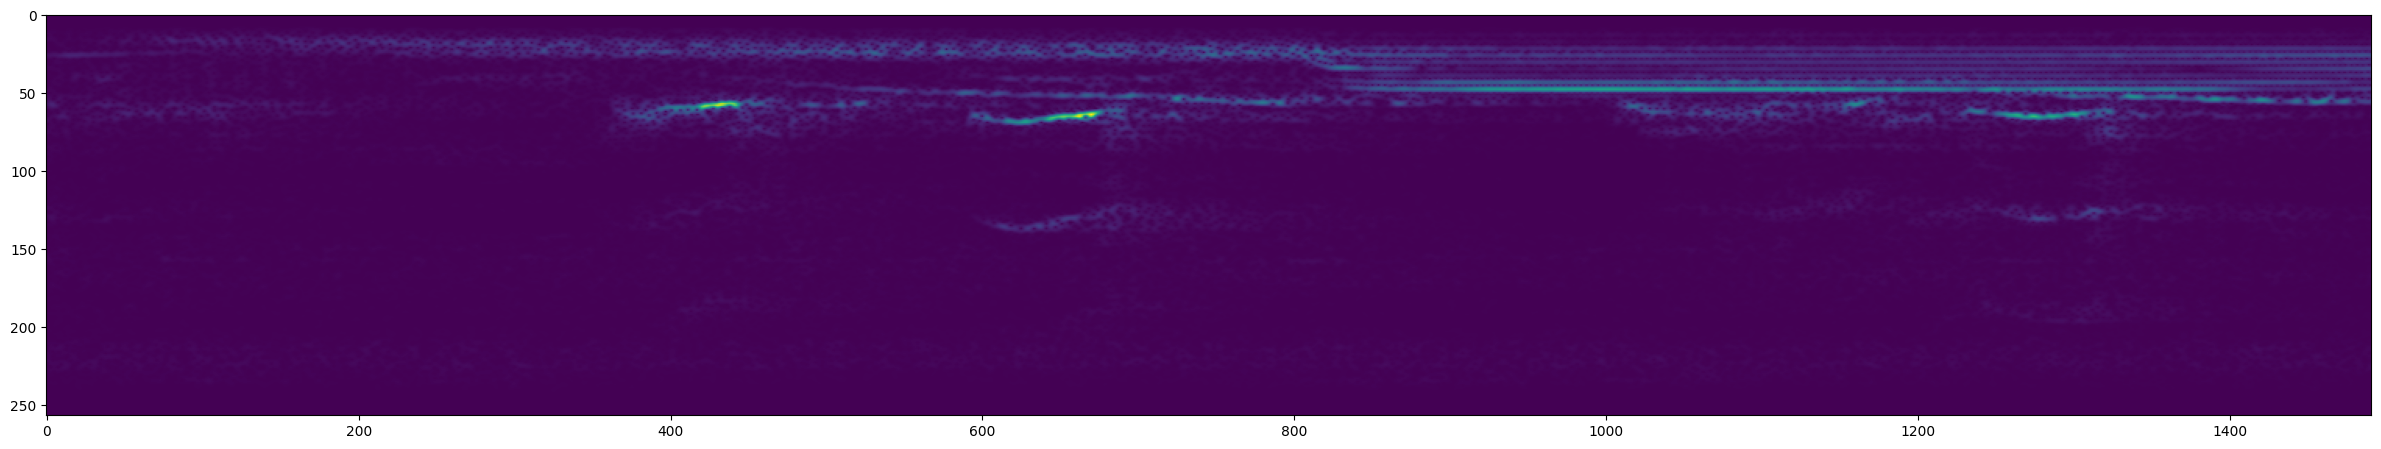

In [34]:
plt.figure(figsize = (30, 30))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [35]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(8)
data = data.prefetch(4)

In [36]:
len(data)

102

In [37]:
len(data) * .7

71.39999999999999

In [38]:
train = data.take(72)
test = data.skip(72).take(30)

In [39]:
samples, labels = train.as_numpy_iterator().next()

In [40]:
samples.shape

(8, 1491, 257, 1)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Activation

In [42]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (1491, 257, 1)))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [43]:
model.compile('Adam', loss = 'BinaryCrossentropy', metrics = [tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1491, 257, 32)     320       
                                                                 
 conv2d_1 (Conv2D)           (None, 1491, 257, 32)     9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 745, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 745, 128, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 745, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 372, 64, 32)      0         
 2D)                                                    

In [45]:
hist = model.fit(train, epochs = 4, validation_data=test)

Epoch 1/4
72/72 [==============================] - 30s 162ms/step - loss: 0.4508 - recall: 0.6306 - precision: 0.8250 - val_loss: 0.2891 - val_recall: 0.5738 - val_precision: 0.9211
Epoch 2/4
72/72 [==============================] - 11s 156ms/step - loss: 0.1853 - recall: 0.8591 - precision: 0.8889 - val_loss: 0.1087 - val_recall: 0.9434 - val_precision: 0.9091
Epoch 3/4
72/72 [==============================] - 11s 154ms/step - loss: 0.1488 - recall: 0.9187 - precision: 0.9187 - val_loss: 0.1359 - val_recall: 0.9254 - val_precision: 1.0000
Epoch 4/4
72/72 [==============================] - 11s 154ms/step - loss: 0.0862 - recall: 0.9658 - precision: 0.9592 - val_loss: 0.1242 - val_recall: 0.9032 - val_precision: 1.0000


In [52]:
x_test, y_test = test.as_numpy_iterator().next()

In [53]:
yhat = model.predict(x_test)

1/1 [==============================] - 0s 32ms/step


In [49]:
yhat

array([[1.0676824e-06],
       [2.9430746e-33],
       [9.7782749e-01],
       [1.4754550e-02],
       [1.0333620e-08],
       [7.5966243e-05],
       [7.6455923e-05],
       [1.0000000e+00]], dtype=float32)

In [55]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [56]:
yhat

[0, 1, 0, 1, 0, 0, 0, 0]

In [58]:
def load_mp3_16k_mono(filename):

  res = tfio.audio.AudioIOTensor(filename)

  tensor = res.to_tensor()
  tensor = tf.math.reduce_sum(tensor, axis = 1)/2

  sample_rate = res.rate

  sample_rate = tf.cast(sample_rate, tf.int64)
  mp3 = tfio.audio.resample(tensor, rate_in = sample_rate, rate_out=16000)

  return mp3



In [59]:
mp3 = os.path.join('data', 'Forest Recordings', 'recording_00.mp3')

In [60]:
tensor = load_mp3_16k_mono(mp3)

In [61]:
tensor

<tf.Tensor: shape=(2880666,), dtype=float32, numpy=
array([ 8.1433272e-12, -5.7019250e-12, -5.3486417e-12, ...,
       -1.1291276e-02, -1.4230422e-02, -3.0555837e-03], dtype=float32)>

In [62]:
#now we will convert this big file into a number of audio slices so that we can make multiple predicions on a single audio clip

In [63]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(tensor, tensor, sequence_length=48000, sequence_stride=48000, batch_size=1) #stride and sequence length same to avoid overlapping

In [68]:
samples, index = audio_slices.as_numpy_iterator().next()

In [69]:
samples.shape

(1, 48000)

In [71]:
len(audio_slices)

60

In [67]:
index

array([8.143327e-12], dtype=float32)

In [80]:
def preprocess_mp3(sample, index):
  sample = sample[0]

  zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
  mp3 = tf.concat([zero_padding, sample], 0)

  spectrogram = tf.signal.stft(mp3, frame_length = 320, frame_step = 32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis = 2)

  return spectrogram

In [84]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(tensor, tensor, sequence_length=48000, sequence_stride=48000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [88]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]
yhat

1/1 [==============================] - 3s 3s/step


[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [89]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [92]:
from itertools import groupby
yhat = [key for key, group in groupby(yhat)]
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [93]:
yhat

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [94]:
#making predictions on all the files

In [96]:
results = {}

for file in os.listdir(os.path.join('data', 'Forest Recordings')):
  filename = os.path.join('data', 'Forest Recordings', file)
  mp3 = load_mp3_16k_mono(filename)

  audioslices = tf.keras.utils.timeseries_dataset_from_array(mp3, mp3, sequence_length=48000, sequence_stride = 48000, batch_size = 1)
  audioslices = audioslices.map(preprocess_mp3)
  audioslices = audioslices.batch(64)

  yhat = model.predict(audioslices)

  results[file] = yhat

1/1 [==============================] - 1s 1s/step


In [99]:
results

{'recording_30.mp3': array([[3.8432261e-25],
        [6.2144301e-22],
        [2.5221643e-05],
        [9.9595946e-01],
        [7.7615857e-15],
        [8.5973012e-28],
        [7.7491233e-17],
        [1.4351762e-12],
        [1.3141996e-11],
        [2.0067483e-12],
        [9.9168488e-30],
        [1.7812480e-19],
        [3.6179545e-28],
        [2.6219200e-12],
        [7.6746227e-13],
        [1.3581568e-32],
        [2.8209250e-20],
        [8.3388556e-15],
        [3.9905445e-20],
        [1.1505512e-12],
        [1.5631016e-27],
        [1.0808974e-33],
        [3.1220737e-13],
        [4.6697828e-12],
        [6.8642527e-29],
        [4.4659685e-16],
        [1.6262648e-12],
        [3.3404943e-09],
        [5.1193297e-20],
        [1.2669034e-12],
        [6.7187346e-22],
        [1.0075171e-21],
        [9.7983676e-01],
        [9.9479866e-01],
        [9.5239493e-25],
        [7.8550021e-28],
        [1.3680769e-11],
        [9.3112963e-14],
        [4.9329246e-15],
     

In [108]:
class_preds = {}
for file, logits in results.items():
  class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]

In [109]:
class_preds

{'recording_30.mp3': [0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0],
 'recording_14.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_86.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_18.mp3': [0,
  0,
  0,
  

In [110]:
post_processed = {}

for file, scores in class_preds.items():
    post_processed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()

In [111]:
post_processed

{'recording_30.mp3': 3,
 'recording_14.mp3': 0,
 'recording_86.mp3': 4,
 'recording_18.mp3': 2,
 'recording_16.mp3': 3,
 'recording_65.mp3': 4,
 'recording_29.mp3': 0,
 'recording_28.mp3': 4,
 'recording_49.mp3': 0,
 'recording_76.mp3': 3,
 'recording_44.mp3': 1,
 'recording_17.mp3': 3,
 'recording_40.mp3': 1,
 'recording_89.mp3': 4,
 'recording_92.mp3': 0,
 'recording_96.mp3': 1,
 'recording_61.mp3': 2,
 'recording_05.mp3': 0,
 'recording_62.mp3': 0,
 'recording_03.mp3': 0,
 'recording_72.mp3': 4,
 'recording_52.mp3': 0,
 'recording_19.mp3': 0,
 'recording_48.mp3': 4,
 'recording_20.mp3': 0,
 'recording_80.mp3': 1,
 'recording_09.mp3': 0,
 'recording_31.mp3': 1,
 'recording_26.mp3': 2,
 'recording_39.mp3': 2,
 'recording_94.mp3': 3,
 'recording_33.mp3': 0,
 'recording_08.mp3': 25,
 'recording_42.mp3': 0,
 'recording_66.mp3': 0,
 'recording_50.mp3': 0,
 'recording_71.mp3': 5,
 'recording_38.mp3': 1,
 'recording_46.mp3': 4,
 'recording_43.mp3': 5,
 'recording_25.mp3': 0,
 'recording_34.

In [112]:
import csv

In [116]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])

    for key, value in post_processed.items():
        writer.writerow([key, value])